In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import random
import math
from collections import Counter

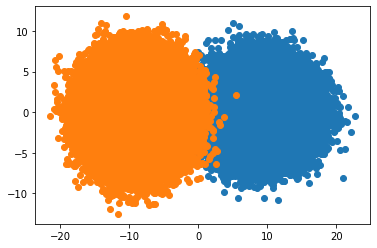

In [98]:
cons=120000
mean = [9, 0]
cov = [[9, 0], [0, 6]]  # diagonal covariance
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, cons).T
plt.plot(x, y, 'o')
mean1 = [-9,0]
cov1 = [[9, 0], [0, 8]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean1, cov1, cons).T
ylabel=[0 for _ in range(cons)]
xlabel=[1 for _ in range(cons)]
plt.plot(x1, y1, 'o')
plt.show()


In [99]:
class1=np.array([x,y]).T
class2=np.array([x1,y1]).T
arr=np.concatenate((class1, class2), axis=0)
label=np.concatenate((xlabel, ylabel), axis=0)
z=label
label=np.reshape(label, (-1, 1))
arr


array([[  8.68720855,  -1.92712896],
       [  8.33219577,  -4.13434645],
       [  7.48595807,  -2.81257707],
       ...,
       [-11.2874372 ,  -1.73035833],
       [ -6.73257352,  -4.01912633],
       [ -7.14088956,  -3.87234581]])

In [100]:
label = keras.utils.to_categorical(label, num_classes=2)
label

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [102]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_54 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_56 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_58 (Dense)             (None, 32)              

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [105]:
history= model.fit(arr, label,
          epochs=10,
          batch_size=128, validation_split=0.2)

Train on 192000 samples, validate on 48000 samples
Epoch 1/10
192000/192000 [==============================] - 6s 32us/step - loss: 0.0152 - acc: 0.9957 - val_loss: 0.0031 - val_acc: 0.9992
Epoch 2/10
192000/192000 [==============================] - 6s 31us/step - loss: 0.0150 - acc: 0.9956 - val_loss: 0.0088 - val_acc: 0.9987
Epoch 3/10
192000/192000 [==============================] - 6s 31us/step - loss: 0.0132 - acc: 0.9965 - val_loss: 0.0078 - val_acc: 0.9987
Epoch 4/10
192000/192000 [==============================] - 6s 31us/step - loss: 0.0111 - acc: 0.9973 - val_loss: 0.0098 - val_acc: 0.9985
Epoch 5/10
192000/192000 [==============================] - 6s 31us/step - loss: 0.0263 - acc: 0.9965 - val_loss: 0.0154 - val_acc: 0.9982
Epoch 6/10
192000/192000 [==============================] - 6s 31us/step - loss: 0.0164 - acc: 0.9970 - val_loss: 0.0070 - val_acc: 0.9987
Epoch 7/10
192000/192000 [==============================] - 6s 31us/step - loss: 0.0195 - acc: 0.9968 - val_loss: 0

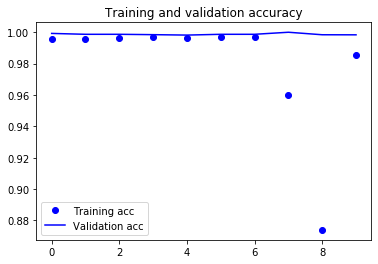

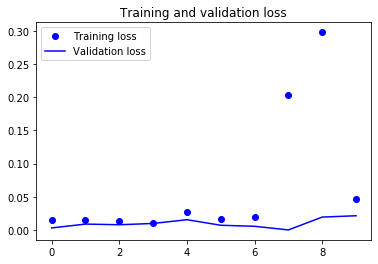

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


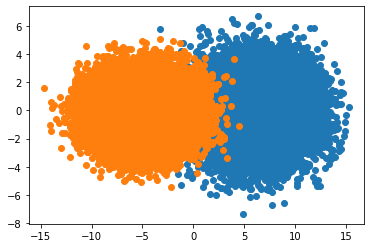

In [73]:
cons=20000
# plt.scatter(x1,y1)
mean = [6, 0]
cov = [[7, 0], [0, 3]]  # diagonal covariance

mean1 = [-5,0]
cov1 = [[6, 0], [0, 2]] 
  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, cons).T
plt.plot(x, y, 'o')
  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean1, cov1, cons).T
ylabel=[0 for _ in range(cons)]
xlabel=[1 for _ in range(cons)]
plt.plot(x1, y1, 'o')
plt.show()


class1=np.array([x,y]).T
class2=np.array([x1,y1]).T
arrtest=np.concatenate((class1, class2), axis=0)
label2=np.concatenate((xlabel, ylabel), axis=0)
labeltest=np.reshape(label2, (-1, 1))


In [69]:
label1 = keras.utils.to_categorical(labeltest, num_classes=2)
label1

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [70]:
loss, acc = model.evaluate(arrtest, label1)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

40000/40000 [==============================] - 1s 22us/step

Testing loss: 0.02, acc: 0.99%


In [71]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for i in range(50):
    # 7. Fit model on training data
    model.fit(arr, label,
              epochs=1,
              batch_size=32, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(arr, label, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(arrtest, label1, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))



Test Accuracy: 0.994725 
Maximum Test Acuracy During Training:  0.9949


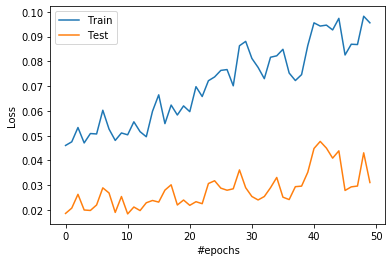

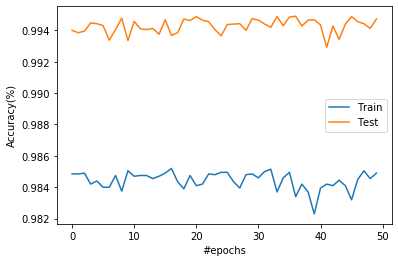

In [72]:
plt.figure(1)
x = np.linspace(5,35,100)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(arrtest)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(label)

predicted:
[1 0 1 ... 0 0 0]
True Label:
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


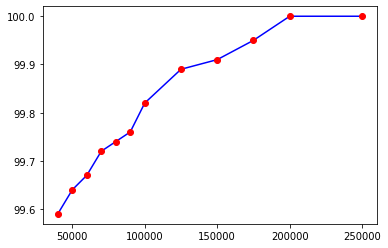

In [120]:
plt.plot(x,y,'b-')
plt.plot(x,y,'ro')

In [7]:
import numpy as np
import math
# Example points in 3-dimensional space...
x = [0, 0,0,1]
y = [1, 0,0,0]
distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
print("Euclidean distance from x to y: ",distance)

Euclidean distance from x to y:  1.4142135623730951
